In [35]:
using Pkg
Pkg.activate("../.."); # Actives the environment at the root of the project
# Using our Carbon-I and vSmartMOM packages (developed by our team)
using CarbonI, Printf
using Dates, DelimitedFiles, XLSX, DataFrames, Statistics

  Activating project at `~/code/gitHub/CarbonI`


In [25]:
using  CairoMakie, Interpolations
include(joinpath("../../src/Plots", "CI_colorsNew.jl"))
# Read the Excel data
filename = "../../data/CarbonI_LongCrossings_Equator.xlsx"

sheetname = "CarbonI_LongCrossings_Equator"
# The readtable function returns a tuple; we convert it to a DataFrame.
data = DataFrame(XLSX.readtable(filename, sheetname))


Row,Time (UTCG),Lat (deg),Lon (deg),Alt (km)
,Any,Any,Any,Any
1,2031-06-01T01:25:19,0,151.334,668.028
2,2031-06-01T03:03:25,0,126.809,668.194
3,2031-06-01T04:41:31,0,102.283,668.268
4,2031-06-01T06:19:37,0,77.756,668.252
5,2031-06-01T07:57:43,0,53.23,668.196
6,2031-06-01T09:35:50,0,28.705,668.162
7,2031-06-01T11:13:56,0,4.18,668.197
8,2031-06-01T12:52:02,0,-20.344,668.235
9,2031-06-01T14:30:08,0,-44.87,668.308


In [3]:
# Convert the "Time (UTCG)" column from String to DateTime
overpass_times = DateTime.(data[!, "Time (UTCG)"]);
lon = Float32.(data[!, "Lon (deg)"]);

In [4]:
# Compute time in days from start:
delta_days = (data[!, "Time (UTCG)"] .- data[1, "Time (UTCG)"]) ./ Day(1) .+1;
lon_center = 55.5;

dTime * 24 = 914.0835294117646


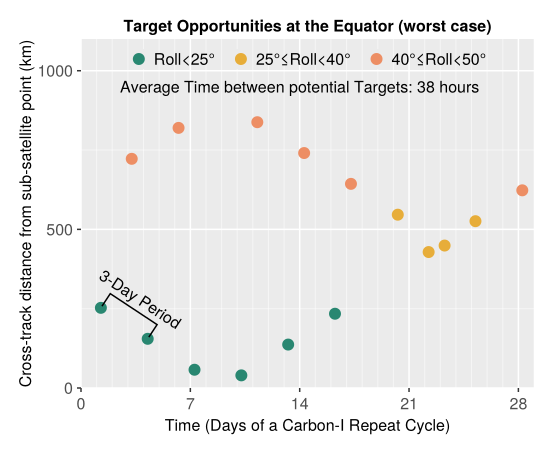

In [46]:
include(joinpath("../../src/Plots", "CI_colorsNew.jl"));

set_theme!(theme_ggplot2())
# 5. Create a Figure and an Axis for the plot using CairoMakie.
fig = Figure(resolution=(550,450))
ax = Axis(fig[1,1];
    ylabel = "Cross-track distance from sub-satellite point (km)",
    xlabel= "Time (Days of a Carbon-I Repeat Cycle)",
    xticks=0:7:30,
    title = "Target Opportunities at the Equator (worst case)",
    xminorticks = IntervalsBetween(7),
    )
#
distance = abs.(lon.-lon_center)*111.3;
dd = ones(length(0:29))
ind_25 = findall(0 .< distance .< 315);
#ind_30 = findall(244 .< distance .< 391);
ind_40 = findall(391 .< distance .< 582);
ind_50 = findall(582 .< distance .< 866);
ind_all = findall(0 .< distance .< 866);

dTime = mean(diff(delta_days[ind_all]))*24;
@show dTime*24

text!(ax,14, 950, text = "Average Time between potential Targets: $( @sprintf("%.0f", dTime) ) hours", align = (:center, :center))
scatter!(ax, delta_days[ind_25], distance[ind_25], markersize=17, color=CarbonI_colors[3],  label = "Roll<25°")
scatter!(ax, delta_days[ind_40], distance[ind_40], markersize=17, color=CarbonI_colors[1],  label = "25°≤Roll<40°")
scatter!(ax, delta_days[ind_50], distance[ind_50], markersize=17, color=CarbonI_colors[10],  label = "40°≤Roll<50°")
#bracket!(ax,delta_days[ind_25[1]], distance[ind_25[1]],delta_days[ind_25[1]], distance[ind_25[1]]; text = "Period length", style = :square)
bracket!(delta_days[ind_25[1]], distance[ind_25[1]],delta_days[ind_25[2]], distance[ind_25[2]], offset = 2, text = "3-Day Period", style = :square, rotation = -0.58)
axislegend(position = :ct,orientation = :horizontal,)
#leg = Legend(fig, ax, orientation = :horizontal,labelsize=12)
#fig[2, 1] = leg




#lines!(ax, delta_days, abs.(lon.-lon_center)*111.3, color = :blue)
ylims!(ax, 0, 1100)
xlims!(ax, 0, 29)
save("../../plots/final/TargetRevistOpportunities.pdf", fig)
fig



In [6]:
CarbonI_colors